In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

housing_data = pd.read_csv('./datasets/housing.csv')
housing_data = housing_data.dropna()
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

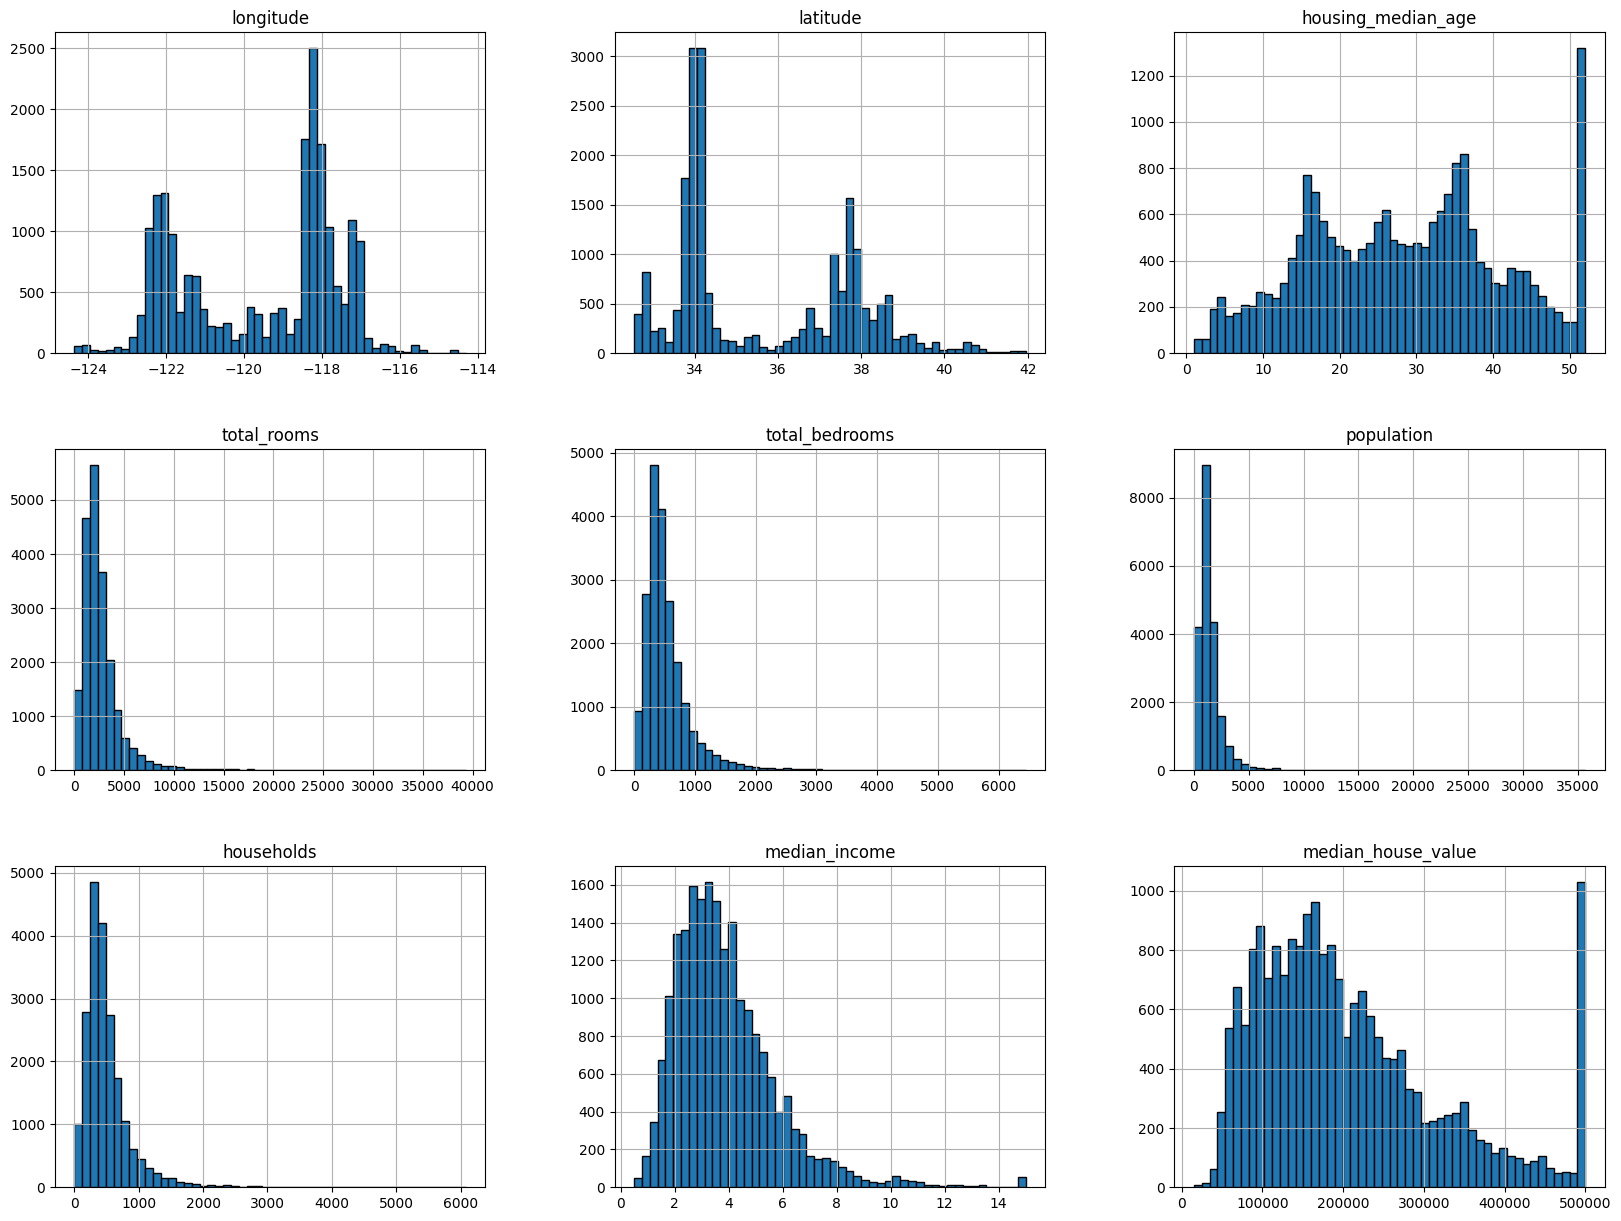

In [2]:
housing_data.hist(bins=50, figsize=(20,15), edgecolor='black')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'population_per_household'}>]],
      dtype=object)

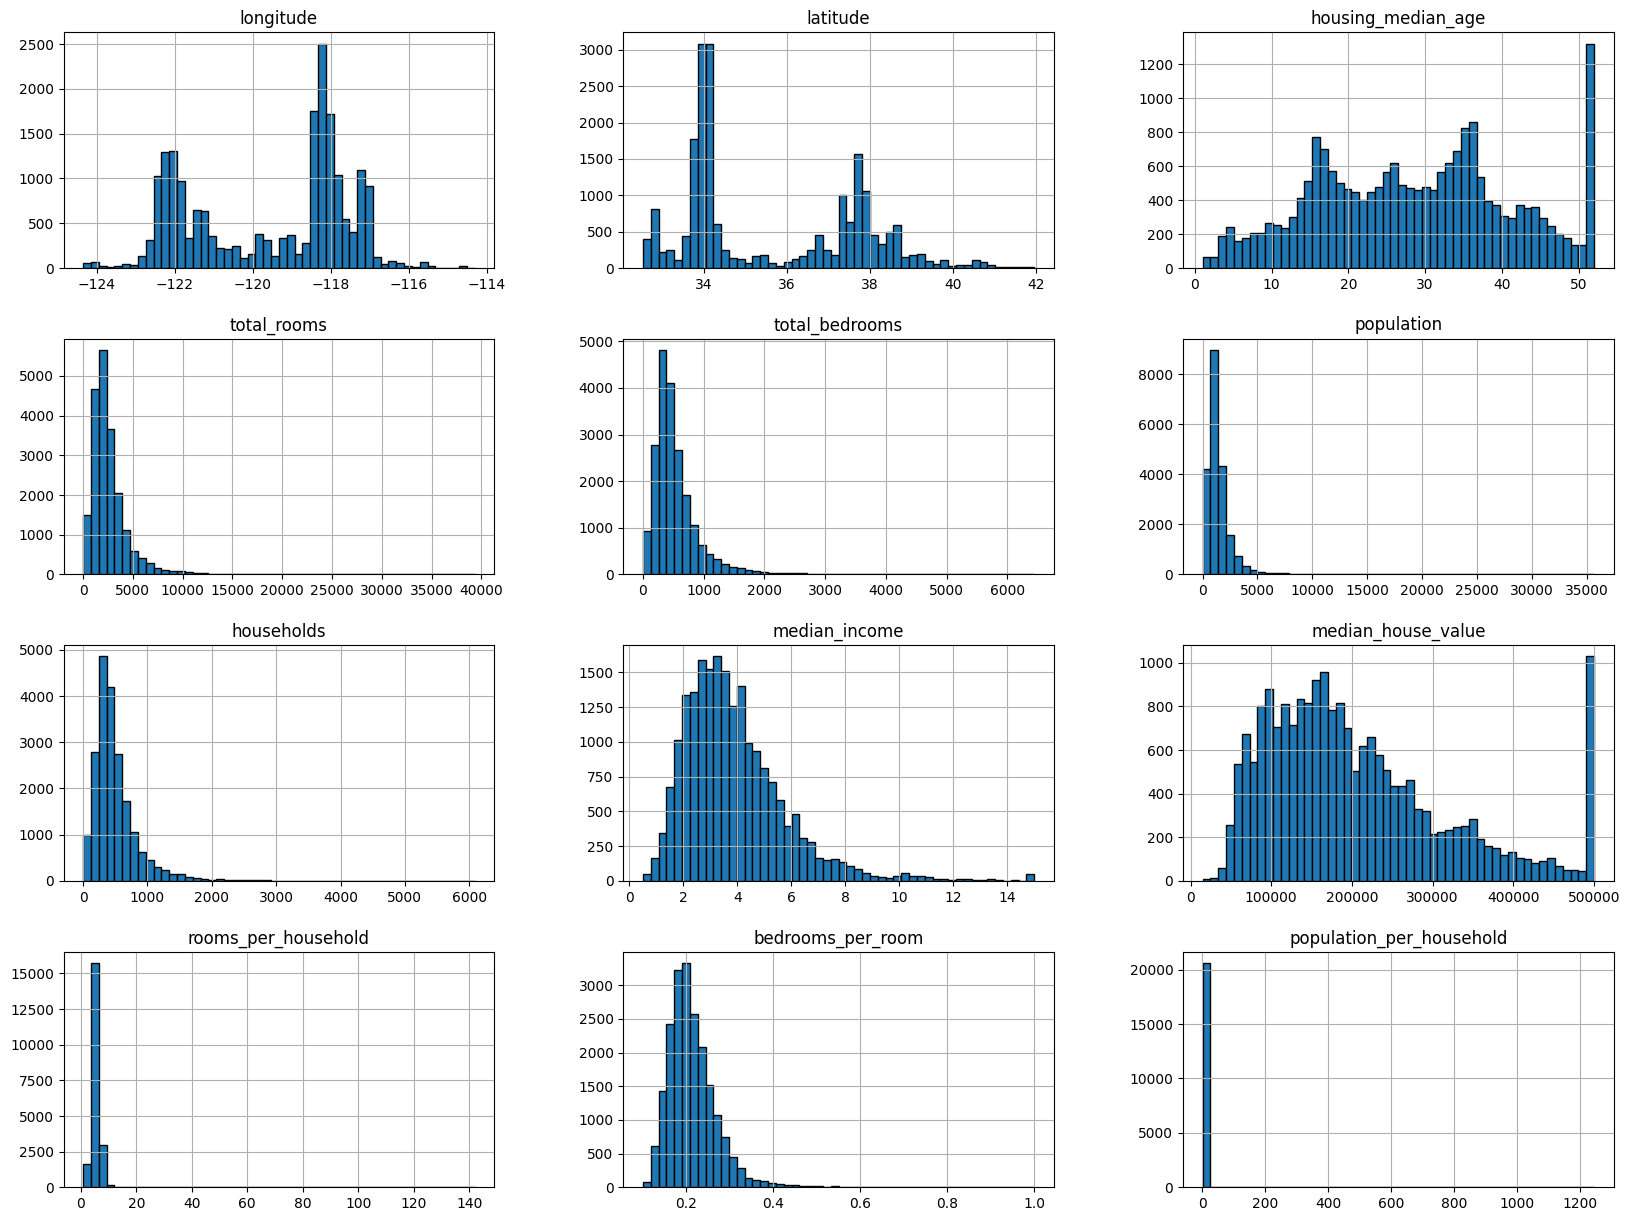

In [3]:
housing_data["rooms_per_household"] = housing_data["total_rooms"] / housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"] / housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"] / housing_data["households"]
# housing_data = housing_data[housing_data["housing_median_age"] <= 50]
# housing_data = housing_data[housing_data["median_house_value"] <= 500000]

housing_data.hist(bins=50, figsize=(20,15), edgecolor='black')

In [4]:
X = housing_data.drop(columns="median_house_value")
y = housing_data["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionando las caracteristicas numericas y categoricas
numeric_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = ["ocean_proximity"]

In [5]:
# Transformador de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

In [6]:
# Creando modelo de regresión lineal con características polinómicas de segundo grado
polynomial_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])

polynomial_pipeline.fit(X_train, y_train)
train_score_poly = r2_score(y_train, polynomial_pipeline.predict(X_train))
test_score_poly = r2_score(y_test, polynomial_pipeline.predict(X_test))

f"Training Score: {train_score_poly:.4f}", f"Test Score: {test_score_poly:.4f}"

('Training Score: 0.7361', 'Test Score: 0.6224')